In [1]:
#!pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import glob 
import datetime
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def load_file_to_pivot(search_path):
    files = glob.glob(search_path,recursive = True)
    print('Number of files to process: ',len(files))
    df = pd.DataFrame()
    
    for filepath in files:
        file = open(filepath, 'r')
        print (filepath,': ',len(file.readlines())) 
        file.close()
        df_aux = pd.read_csv(filepath,delimiter =';')
        df_aux["Tipo"].fillna('Normal',inplace=True)
        df = df.append(df_aux)
        
    df_wide = df.pivot_table(index=['Estación', 'Serial', 'Fecha'],columns=['Componente','Variable','Tipo'],values=['Valor'])
    #df_wide.columns = df.columns.droplevel()
    df_wide.columns = ["_".join(x) for x in df_wide .columns.ravel()]
    df_wide.reset_index(inplace=True)
    #df_aux_wide.Estación = df_aux_wide.Estación.apply(lambda x: x.replace('"', ""))
        
    df_wide.Fecha = pd.to_datetime(df_wide.Fecha)
    df_wide["Year"] = df_wide.Fecha.dt.year
    df_wide["Mes"] = df_wide.Fecha.dt.month
    df_wide["Semana"] = df_wide.Fecha.dt.isocalendar().week
    df_wide["Dia"]= df_wide.Fecha.dt.day
    df_wide["Hora"]= df_wide.Fecha.dt.hour
    print("Fin")
    return df_wide

## Aerocivil

## Estación 1324

In [4]:
df_aero1324 = load_file_to_pivot('../data/raw/aerocivil/*13_24*.csv')

Number of files to process:  2
../data/raw/aerocivil/estacionmonitoreoruidointeligente13_24_2020-03.csv :  602158
../data/raw/aerocivil/estacionmonitoreoruidointeligente13_24_2020-04.csv :  485154
Fin


In [5]:
df_aero1324.shape

(16601, 74)

In [7]:
df_aero1324_sliced = df_aero1324[['Fecha',
 'Valor_Meteorología_Dirección del Viento_Normal',
       'Valor_Meteorología_Humedad Relativa_Normal',
       'Valor_Meteorología_Precipitación_Normal',
       'Valor_Meteorología_Presión Atmosférica_Normal',
       'Valor_Meteorología_Temperatura Ambiente_Normal',
       'Valor_Meteorología_Velocidad del Viento_Normal',
       'Valor_Ruido_L10_Impulso', 'Valor_Ruido_L10_Leq',
       'Valor_Ruido_L10_Pico', 'Valor_Ruido_L10_Slow',
       'Valor_Ruido_L50_Impulso', 'Valor_Ruido_L50_Leq',
       'Valor_Ruido_L50_Pico', 'Valor_Ruido_L50_Slow',
       'Valor_Ruido_L90_Impulso', 'Valor_Ruido_L90_Leq',
       'Valor_Ruido_L90_Pico', 'Valor_Ruido_L90_Slow',
 'Valor_Ruido_Leq_Impulso', 'Valor_Ruido_Leq_Leq',
       'Valor_Ruido_Leq_Pico', 'Valor_Ruido_Leq_Slow',
       'Valor_Ruido_Lmax_Impulso', 'Valor_Ruido_Lmax_Leq',
       'Valor_Ruido_Lmax_Pico', 'Valor_Ruido_Lmax_Slow',
       'Valor_Ruido_Lmin_Impulso', 'Valor_Ruido_Lmin_Leq',
       'Valor_Ruido_Lmin_Pico', 'Valor_Ruido_Lmin_Slow', 'Year', 'Mes',
       'Semana', 'Dia', 'Hora']].copy()

In [8]:
#report = pandas_profiling.ProfileReport(df_aero1324_sliced )
#report.to_file("report_aero1324.html")

In [9]:
df_aero1324_sliced_more = df_aero1324[['Fecha','Year', 'Mes',
       'Semana', 'Dia', 'Hora',
 'Valor_Meteorología_Dirección del Viento_Normal',
       'Valor_Meteorología_Humedad Relativa_Normal',
       'Valor_Meteorología_Precipitación_Normal',
       'Valor_Meteorología_Presión Atmosférica_Normal',
       'Valor_Meteorología_Temperatura Ambiente_Normal',
       'Valor_Meteorología_Velocidad del Viento_Normal',
       'Valor_Ruido_L50_Impulso']].copy()

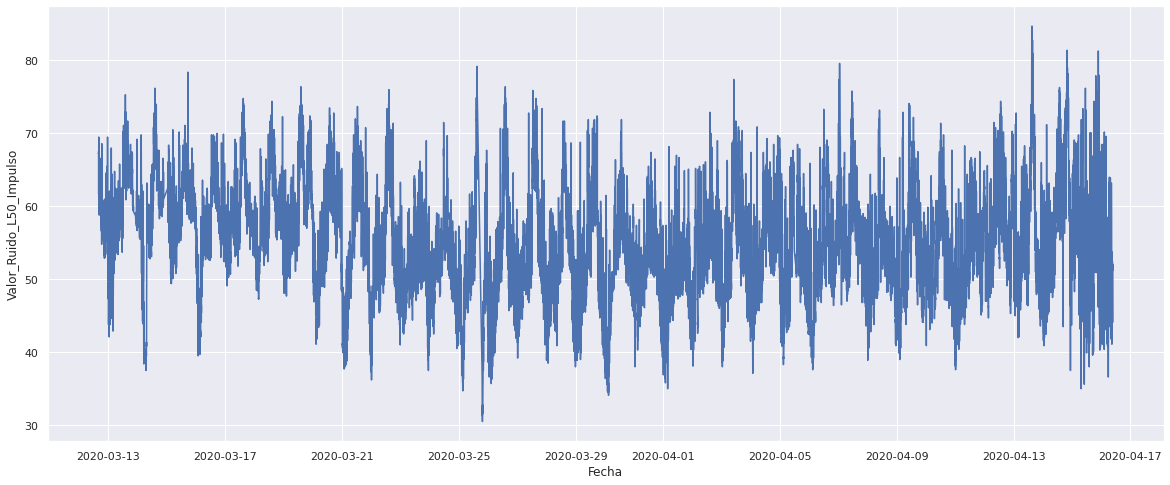

In [10]:
sns.set(rc={'figure.figsize':(20,8)})

ax = sns.lineplot(x="Fecha", 
             y='Valor_Ruido_L50_Impulso',
             data=df_aero1324_sliced_more)

plt.show()

<AxesSubplot:xlabel='Dia', ylabel='Valor_Ruido_L50_Impulso'>

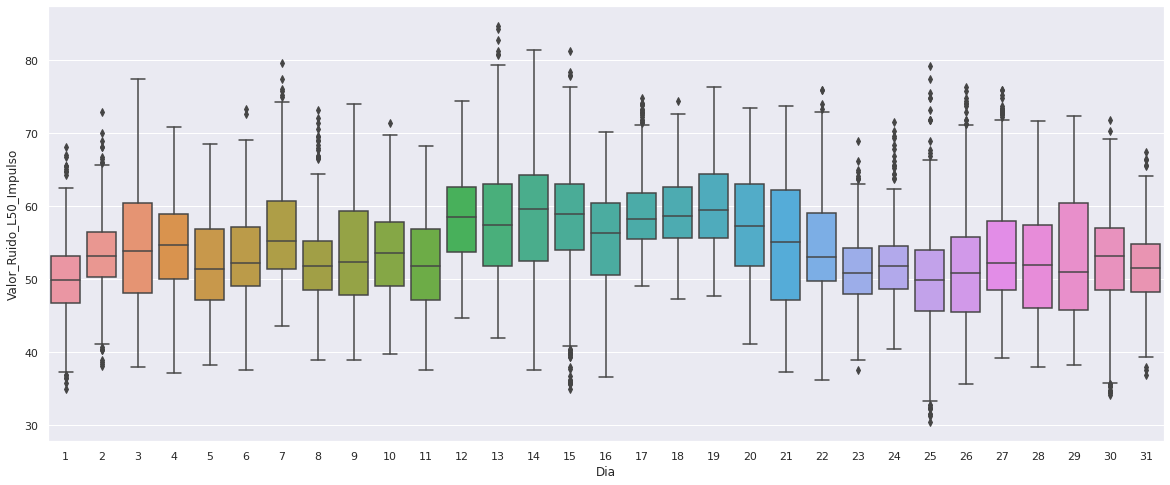

In [11]:
sns.boxplot(x='Dia', y='Valor_Ruido_L50_Impulso',
             data=df_aero1324_sliced_more)

<AxesSubplot:xlabel='Semana', ylabel='Valor_Ruido_L50_Impulso'>

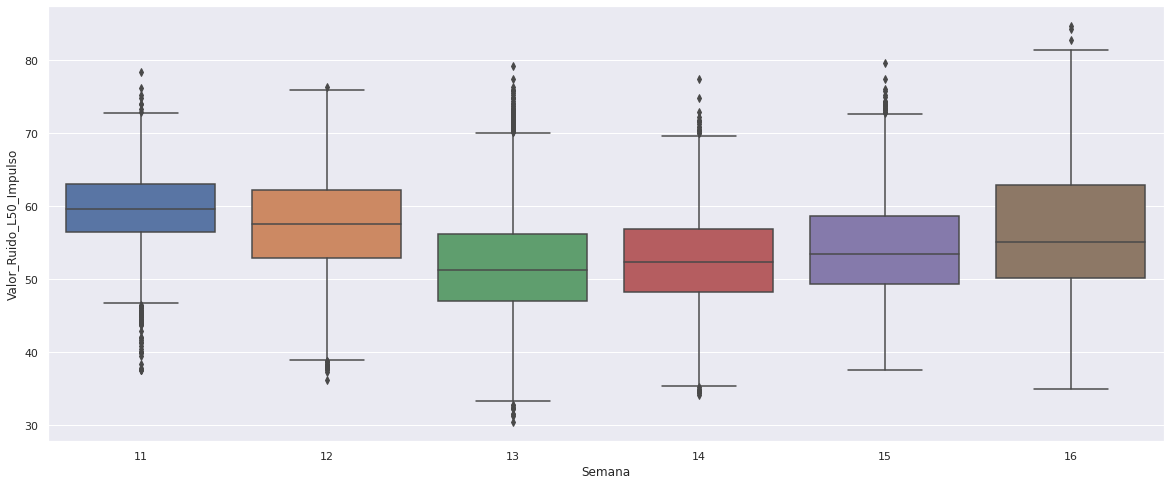

In [12]:
sns.boxplot(x='Semana', y='Valor_Ruido_L50_Impulso',
             data=df_aero1324_sliced_more)

<AxesSubplot:xlabel='Hora', ylabel='Valor_Ruido_L50_Impulso'>

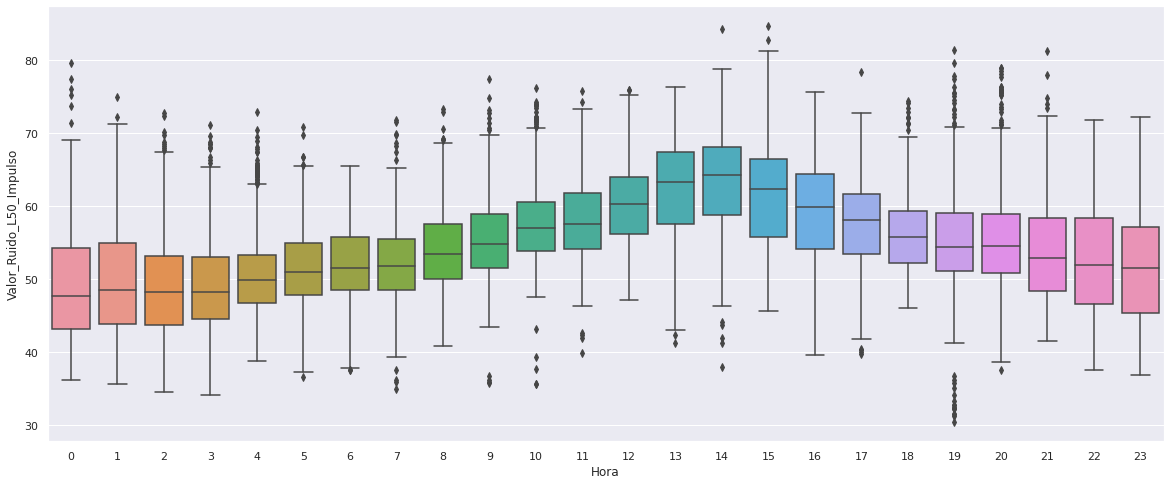

In [13]:
sns.boxplot(x='Hora', y='Valor_Ruido_L50_Impulso',
             data=df_aero1324_sliced_more)

Year


/home/jovyan/.local/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


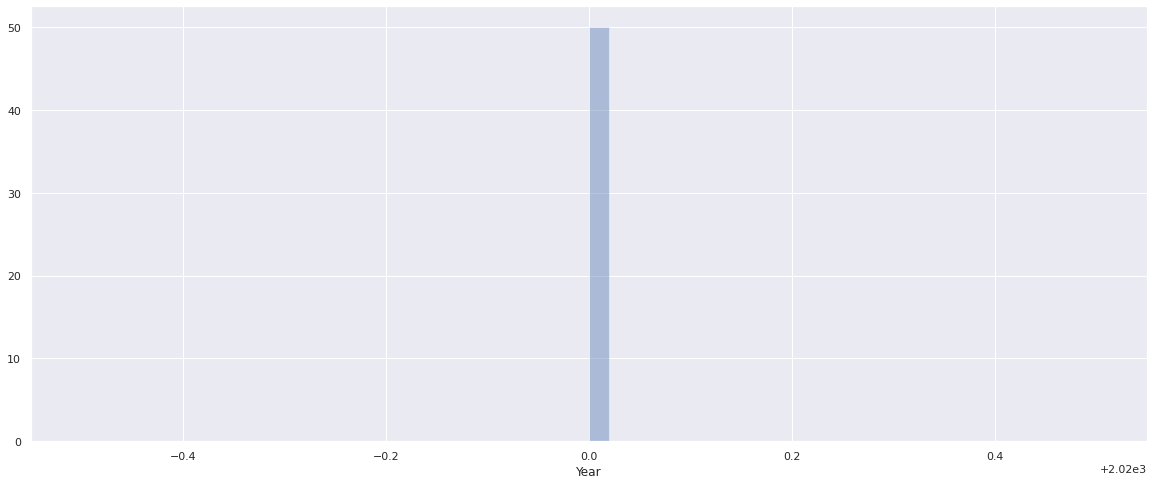

Mes


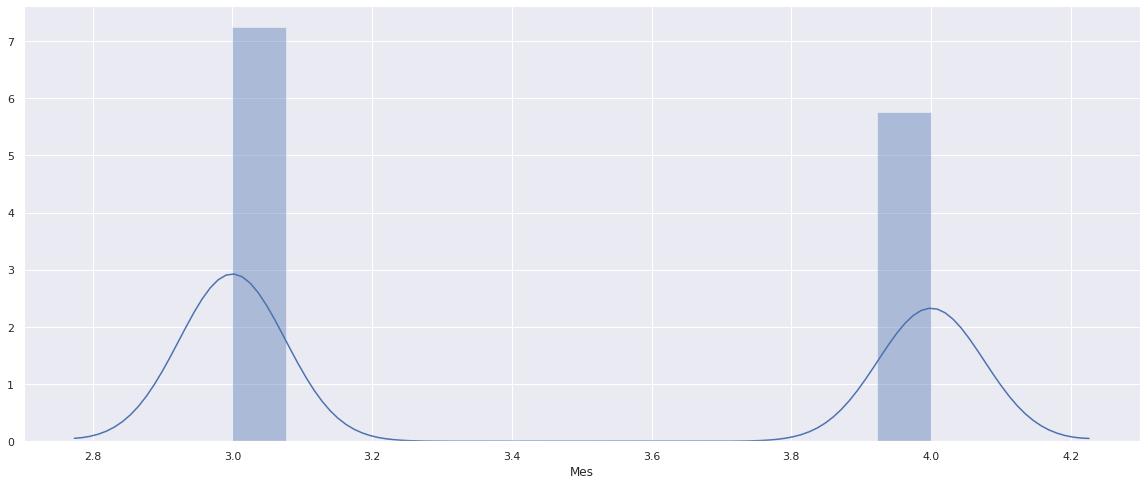

Semana


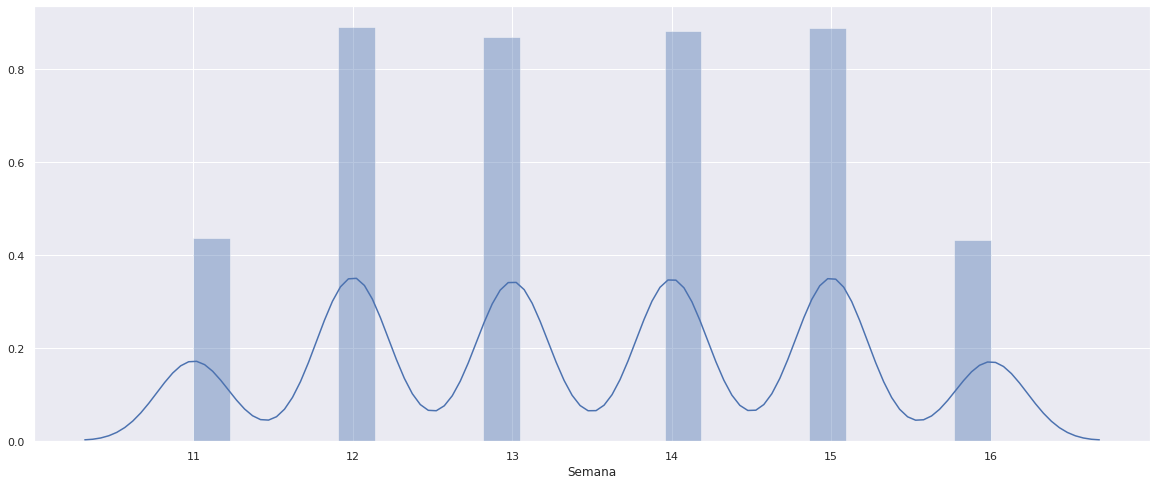

Dia


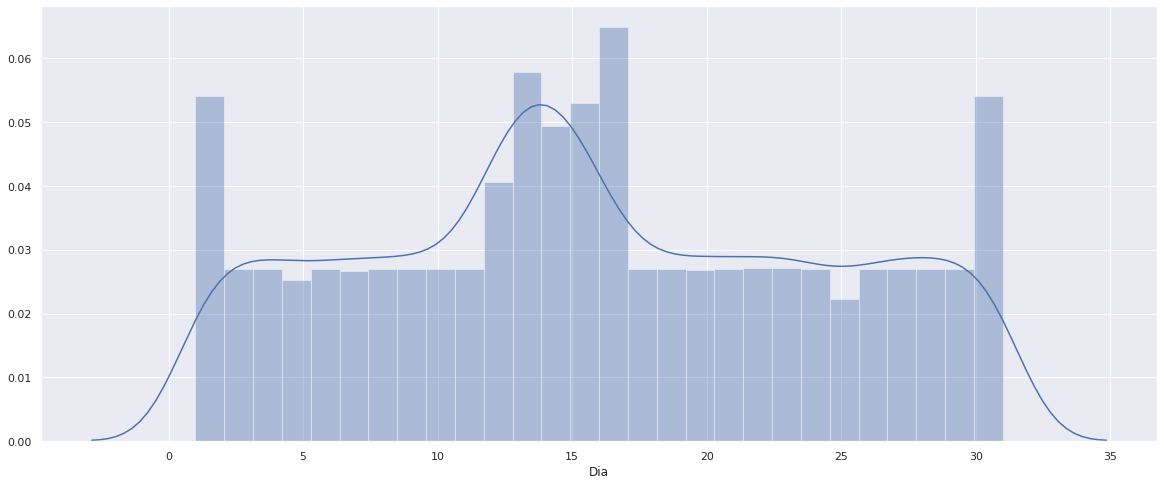

Hora


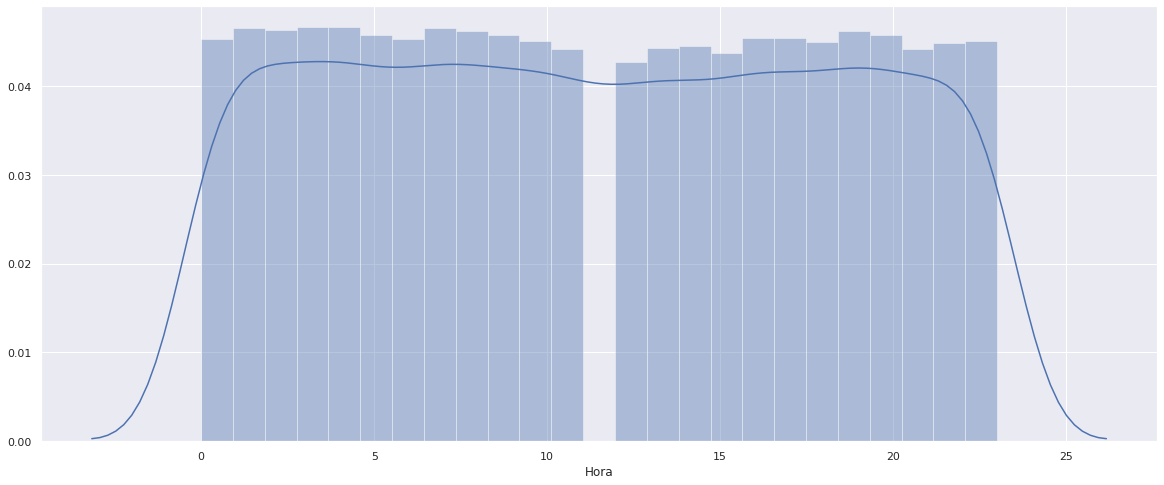

Valor_Meteorología_Dirección del Viento_Normal


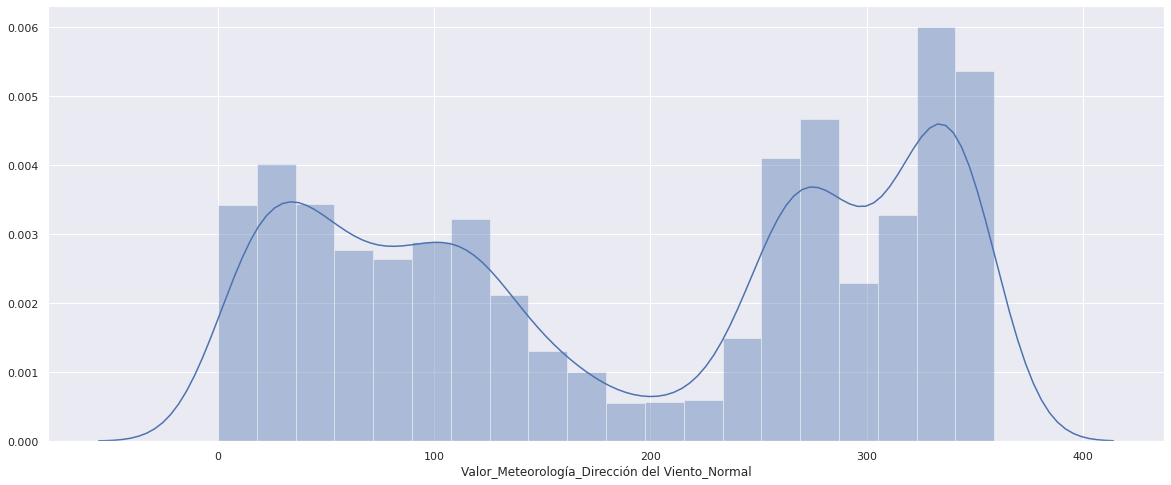

Valor_Meteorología_Humedad Relativa_Normal


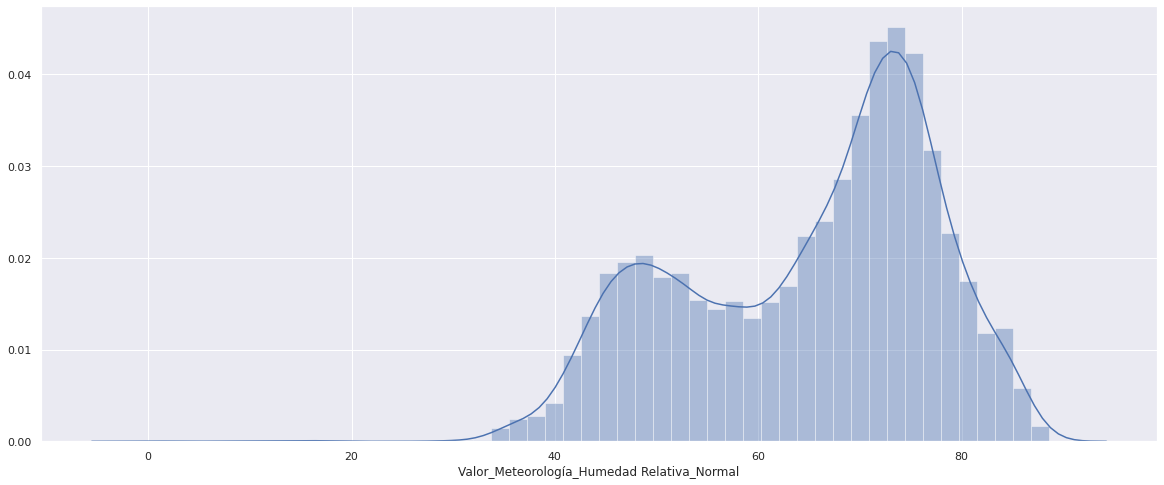

Valor_Meteorología_Precipitación_Normal


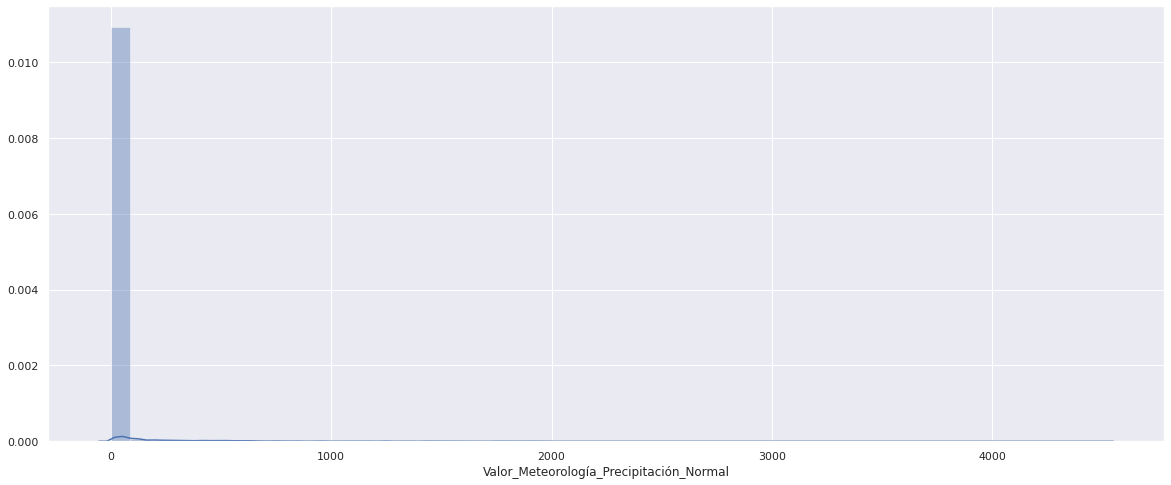

Valor_Meteorología_Presión Atmosférica_Normal


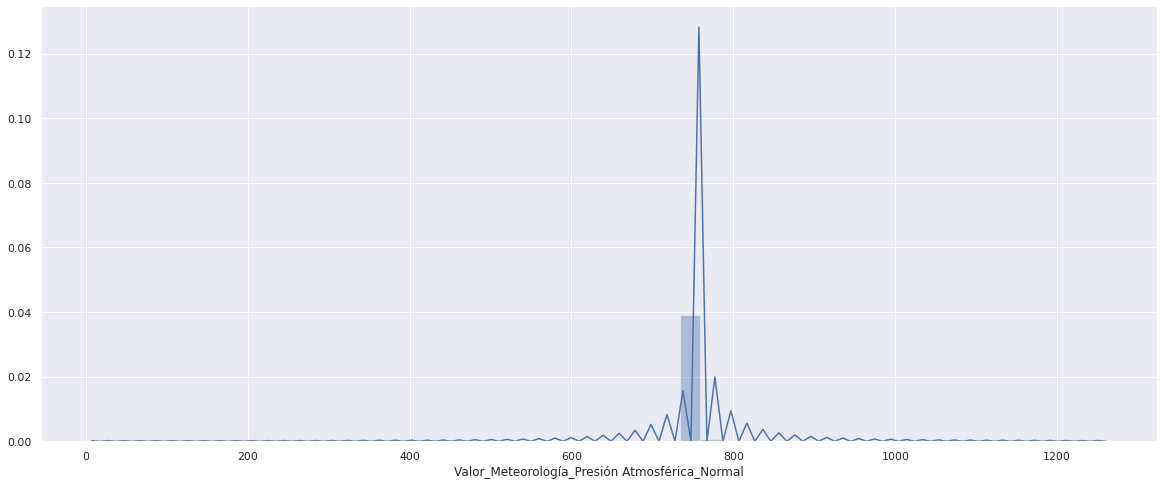

Valor_Meteorología_Temperatura Ambiente_Normal


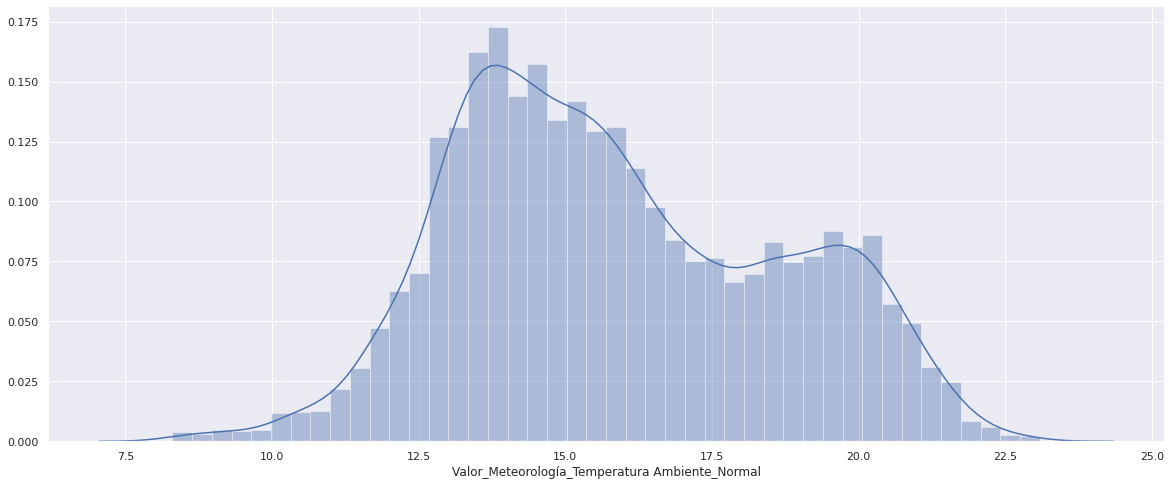

Valor_Meteorología_Velocidad del Viento_Normal


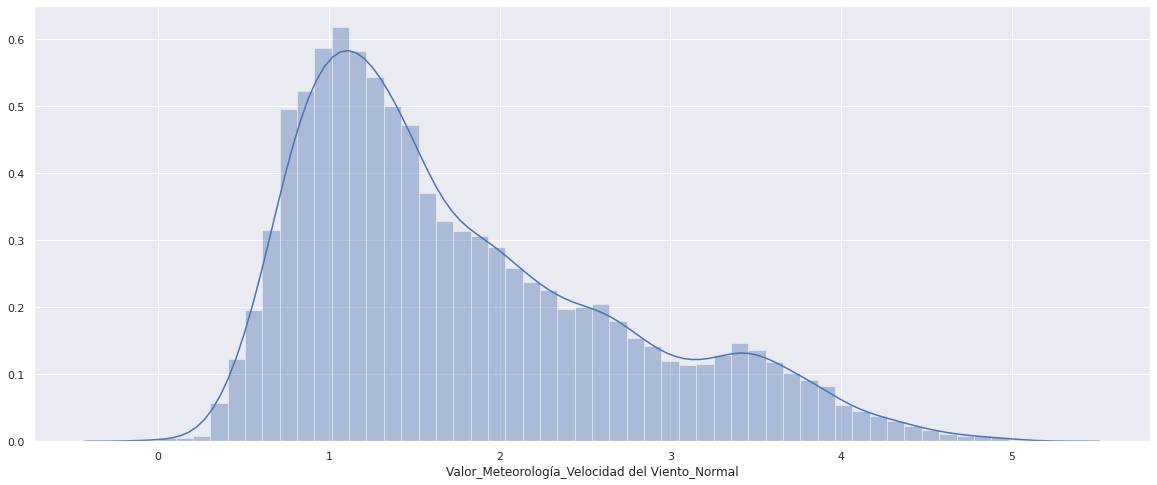

Valor_Ruido_L50_Impulso


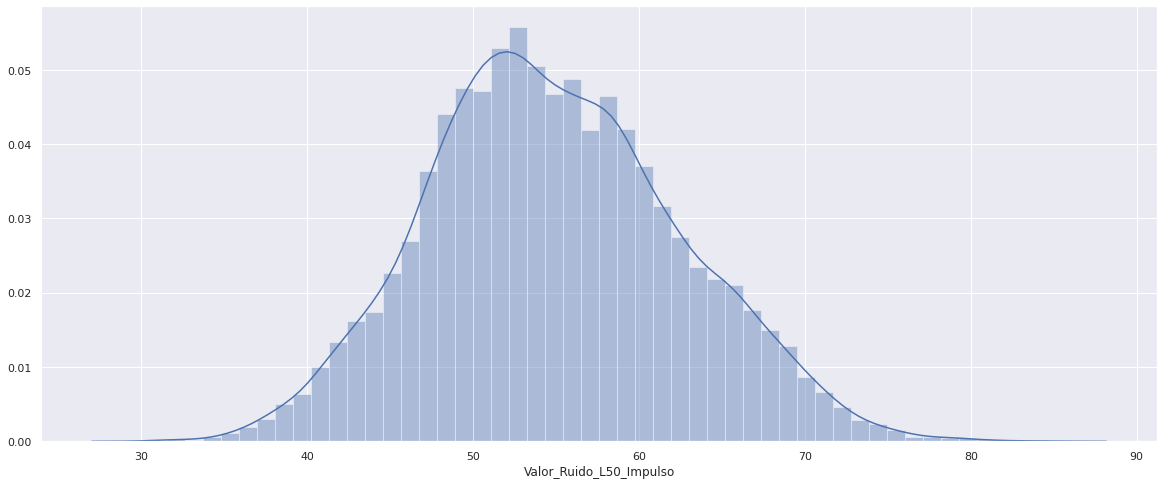

In [14]:
for var in df_aero1324_sliced_more.columns[1:]:
    print(var)
    sns.distplot(df_aero1324_sliced_more[df_aero1324_sliced_more[var]>=0][var])
    plt.show()

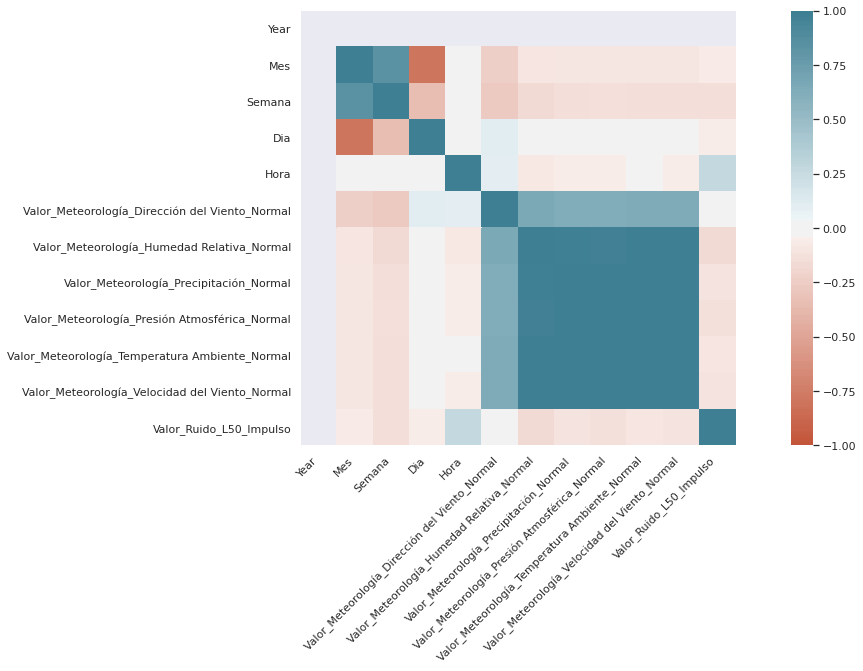

In [15]:
corr = df_aero1324_sliced_more.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
bins = [10, 20,30, 40, 50, 60,70,80,90, np.inf]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]

df_aero1324_sliced_more['HumedadRangos'] = pd.cut(df_aero1324_sliced_more['Valor_Meteorología_Humedad Relativa_Normal'], bins, labels)

In [21]:
bins = [600, 650,700, 750, 800, 850,900,950,1000, np.inf]
labels = [f'{i}+' if j==np.inf else f'{i}-{j}' for i, j in zip(bins, bins[1:])]

df_aero1324_sliced_more['PresionRangos'] = pd.cut(df_aero1324_sliced_more['Valor_Meteorología_Presión Atmosférica_Normal'], bins, labels)

In [25]:

df_aero1324_sliced_more.head()

,Fecha,Year,Mes,Semana,Dia,Hora,Valor_Meteorología_Dirección del Viento_Normal,Valor_Meteorología_Humedad Relativa_Normal,Valor_Meteorología_Precipitación_Normal,Valor_Meteorología_Presión Atmosférica_Normal,Valor_Meteorología_Temperatura Ambiente_Normal,Valor_Meteorología_Velocidad del Viento_Normal,Valor_Ruido_L50_Impulso,HumedadRangos,PresionRangos
0,2020-03-12 15:46:17,2020,3,11,12,15,260.928177,59.840331,0.0,753.244980,19.050829,4.286740,67.500000,"(50.0, 60.0]","(750.0, 800.0]"
1,2020-03-12 15:49:17,2020,3,11,12,15,263.408840,59.976667,0.0,753.288319,18.981768,4.300000,67.400002,"(50.0, 60.0]","(750.0, 800.0]"
2,2020-03-12 15:52:17,2020,3,11,12,15,265.370166,60.430939,0.0,753.370566,19.018889,4.300000,67.199997,"(60.0, 70.0]","(750.0, 800.0]"
3,2020-03-12 15:55:17,2020,3,11,12,15,266.000000,60.574033,0.0,749.215564,18.935911,4.193333,67.300003,"(60.0, 70.0]","(700.0, 750.0]"
4,2020-03-12 15:58:16,2020,3,11,12,15,266.000000,60.448619,0.0,753.434439,19.062984,4.030939,61.599998,"(60.0, 70.0]","(750.0, 800.0]"


<AxesSubplot:xlabel='PresionRangos', ylabel='Valor_Ruido_L50_Impulso'>

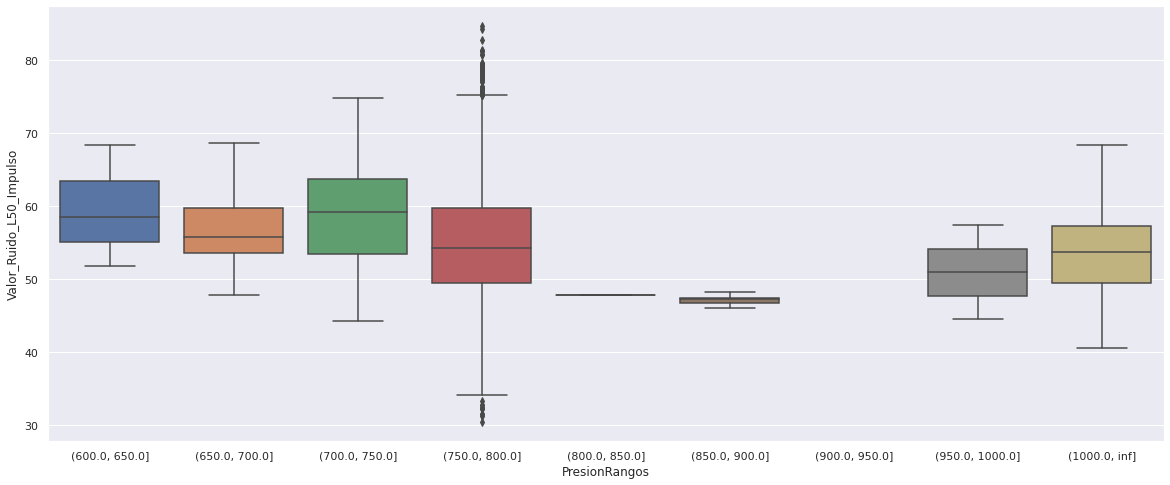

In [26]:
sns.boxplot(x='PresionRangos', y='Valor_Ruido_L50_Impulso',
             data=df_aero1324_sliced_more)

<AxesSubplot:xlabel='HumedadRangos', ylabel='Valor_Ruido_L50_Impulso'>

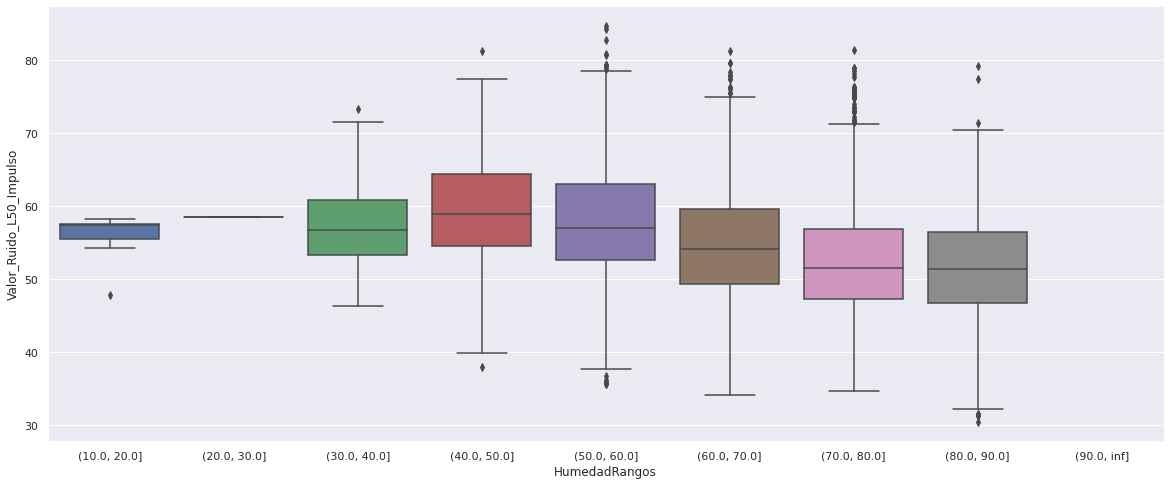

In [19]:
sns.boxplot(x='HumedadRangos', y='Valor_Ruido_L50_Impulso',
             data=df_aero1324_sliced_more)

## Estacion 7 13

In [11]:
df_aero713 = load_file_to_pivot('../data/raw/aerocivil/*7_13*.csv')

Number of files to process:  4
../data/raw/aerocivil/estacionmonitoreoruidointeligente7_13_2020-04.csv :  460205
../data/raw/aerocivil/estacionmonitoreoruidointeligente7_13_2020-05.csv :  927573
../data/raw/aerocivil/estacionmonitoreoruidointeligente7_13_2020-06.csv :  908031
../data/raw/aerocivil/estacionmonitoreoruidointeligente7_13_2020-07.csv :  522054
Fin


In [12]:
df_aero713.shape

(42826, 74)

In [13]:
df_aero713_sliced = df_aero713[['Fecha',
 'Valor_Meteorología_Dirección del Viento_Normal',
       'Valor_Meteorología_Humedad Relativa_Normal',
       'Valor_Meteorología_Precipitación_Normal',
       'Valor_Meteorología_Presión Atmosférica_Normal',
       'Valor_Meteorología_Temperatura Ambiente_Normal',
       'Valor_Meteorología_Velocidad del Viento_Normal',
       'Valor_Ruido_L10_Impulso', 'Valor_Ruido_L10_Leq',
       'Valor_Ruido_L10_Pico', 'Valor_Ruido_L10_Slow',
       'Valor_Ruido_L50_Impulso', 'Valor_Ruido_L50_Leq',
       'Valor_Ruido_L50_Pico', 'Valor_Ruido_L50_Slow',
       'Valor_Ruido_L90_Impulso', 'Valor_Ruido_L90_Leq',
       'Valor_Ruido_L90_Pico', 'Valor_Ruido_L90_Slow',
 'Valor_Ruido_Leq_Impulso', 'Valor_Ruido_Leq_Leq',
       'Valor_Ruido_Leq_Pico', 'Valor_Ruido_Leq_Slow',
       'Valor_Ruido_Lmax_Impulso', 'Valor_Ruido_Lmax_Leq',
       'Valor_Ruido_Lmax_Pico', 'Valor_Ruido_Lmax_Slow',
       'Valor_Ruido_Lmin_Impulso', 'Valor_Ruido_Lmin_Leq',
       'Valor_Ruido_Lmin_Pico', 'Valor_Ruido_Lmin_Slow', 'Year', 'Mes',
       'Semana', 'Dia', 'Hora']].copy()

In [14]:
#report = pandas_profiling.ProfileReport(df_aero713_sliced )
#report.to_file("report_aero713.html")

In [15]:
df_aero713_sliced_more = df_aero713[['Fecha','Year', 'Mes',
       'Semana', 'Dia', 'Hora',
 'Valor_Meteorología_Dirección del Viento_Normal',
       'Valor_Meteorología_Humedad Relativa_Normal',
       'Valor_Meteorología_Precipitación_Normal',
       'Valor_Meteorología_Presión Atmosférica_Normal',
       'Valor_Meteorología_Temperatura Ambiente_Normal',
       'Valor_Meteorología_Velocidad del Viento_Normal',
       'Valor_Ruido_L50_Impulso']].copy()

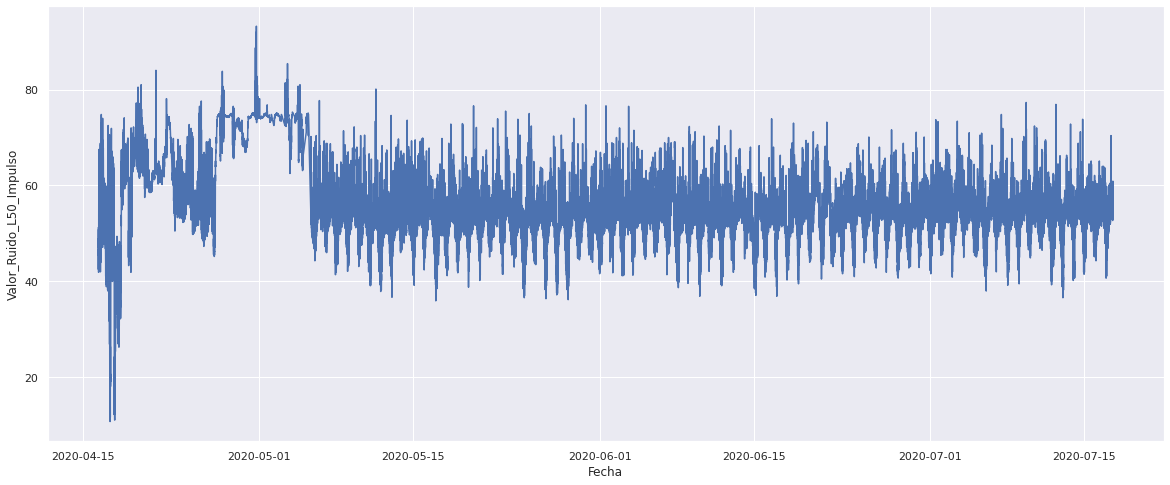

In [38]:
sns.set(rc={'figure.figsize':(20,8)})

ax = sns.lineplot(x="Fecha", 
             y='Valor_Ruido_L50_Impulso',
             data=df_aero713_sliced_more)

plt.show()

<AxesSubplot:xlabel='Dia', ylabel='Valor_Ruido_L50_Impulso'>

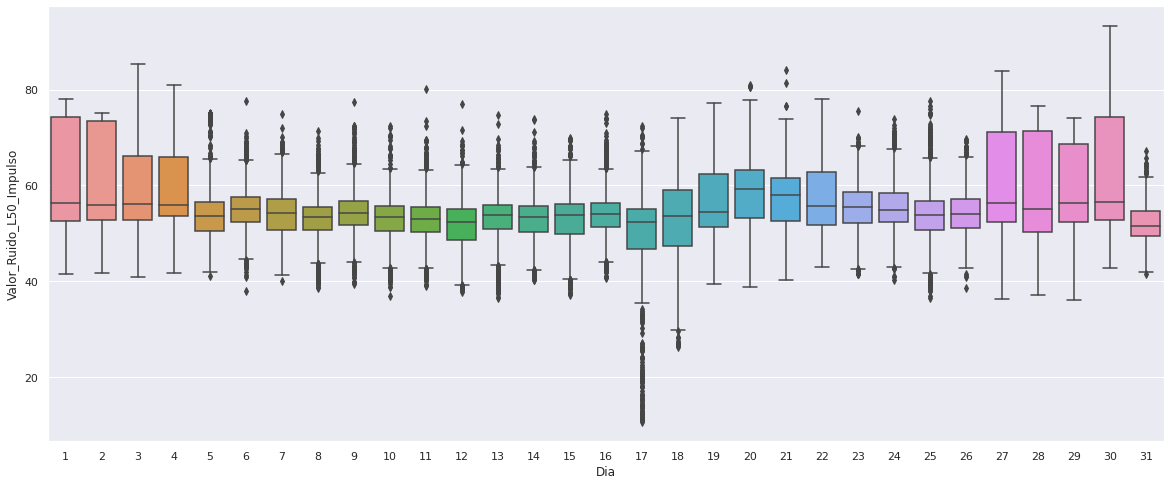

In [39]:
sns.boxplot(x='Dia', y='Valor_Ruido_L50_Impulso',
             data=df_aero713_sliced_more)

<AxesSubplot:xlabel='Semana', ylabel='Valor_Ruido_L50_Impulso'>

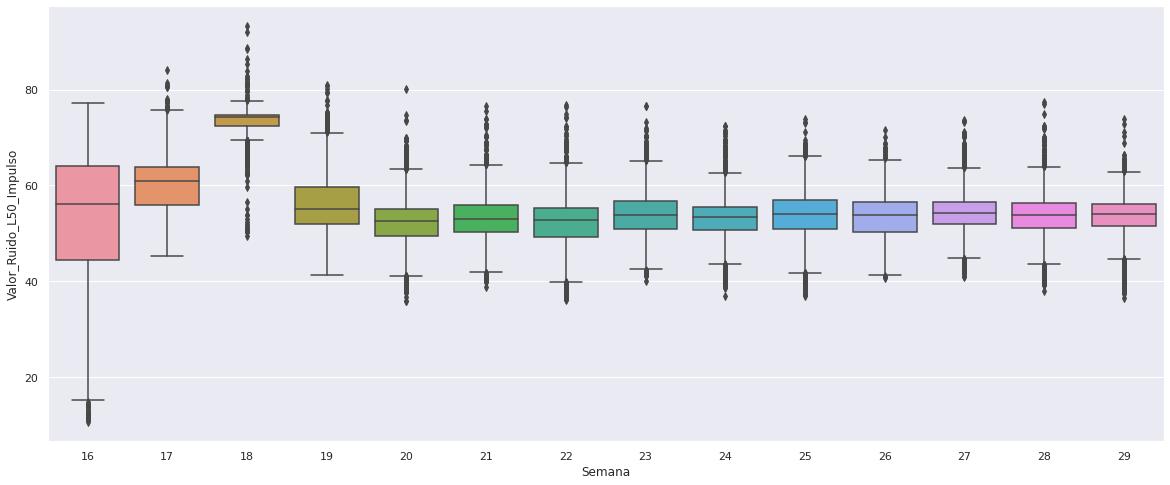

In [40]:
sns.boxplot(x='Semana', y='Valor_Ruido_L50_Impulso',
             data=df_aero713_sliced_more)

<AxesSubplot:xlabel='Hora', ylabel='Valor_Ruido_L50_Impulso'>

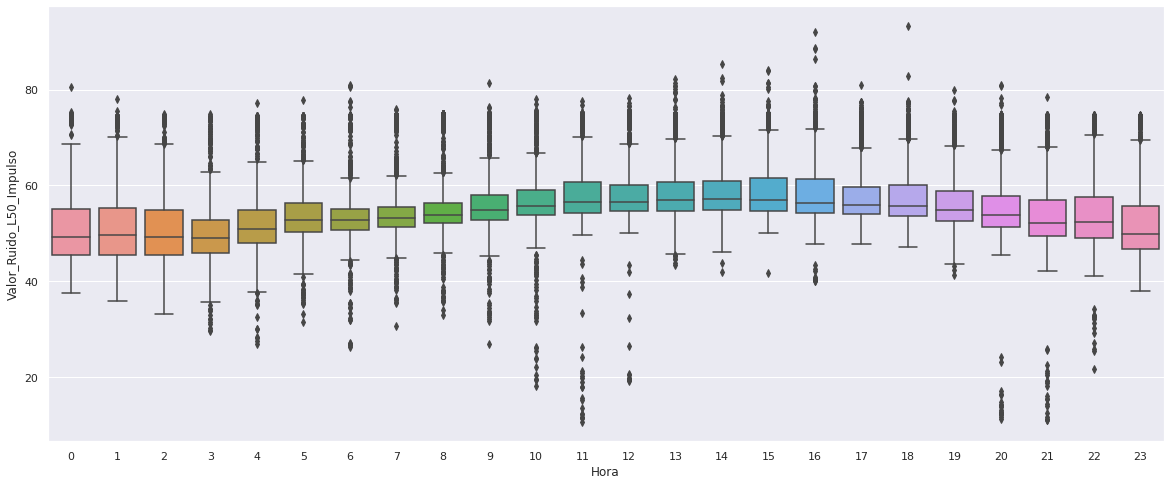

In [41]:
sns.boxplot(x='Hora', y='Valor_Ruido_L50_Impulso',
             data=df_aero713_sliced_more)

Year


/home/jovyan/.local/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


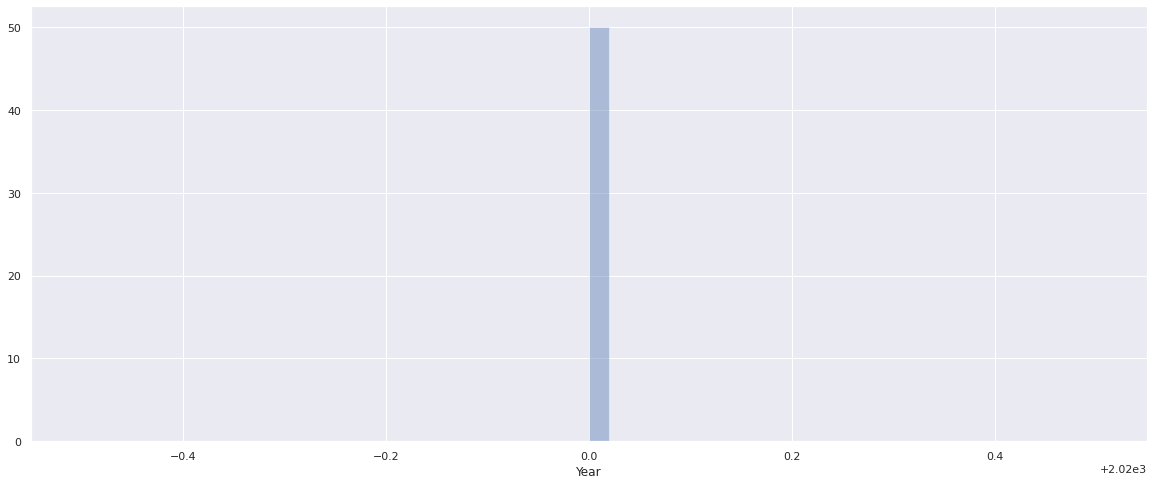

Mes


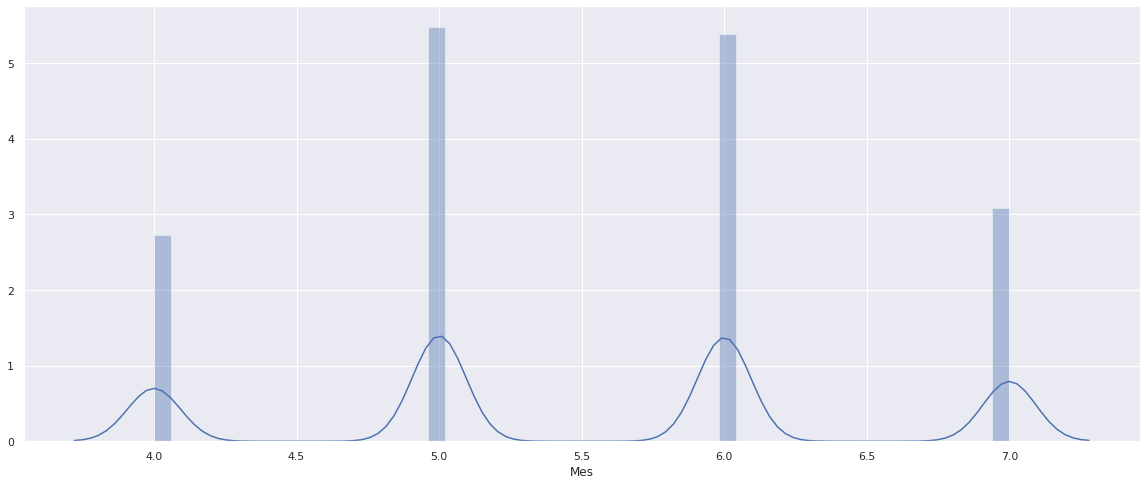

Semana


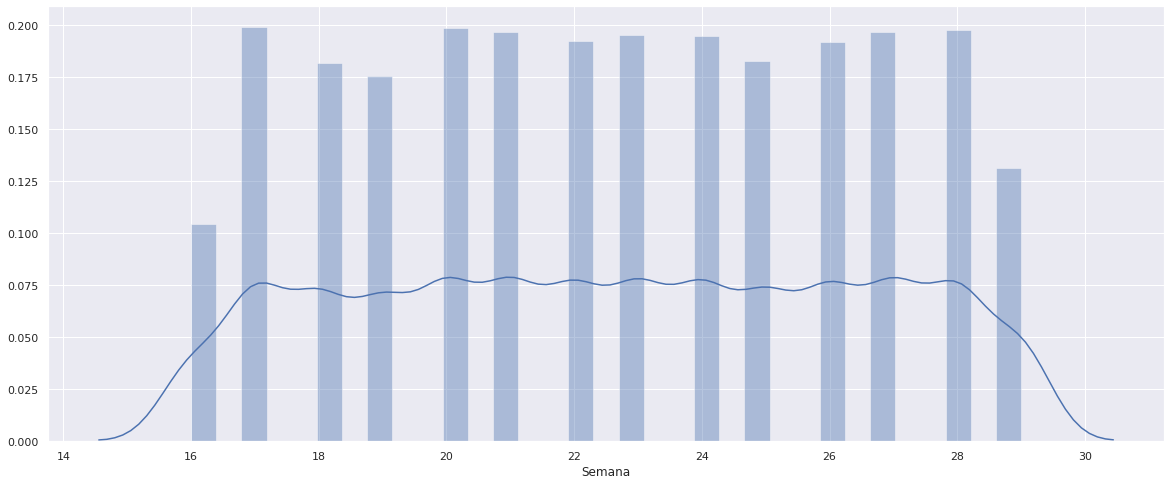

Dia


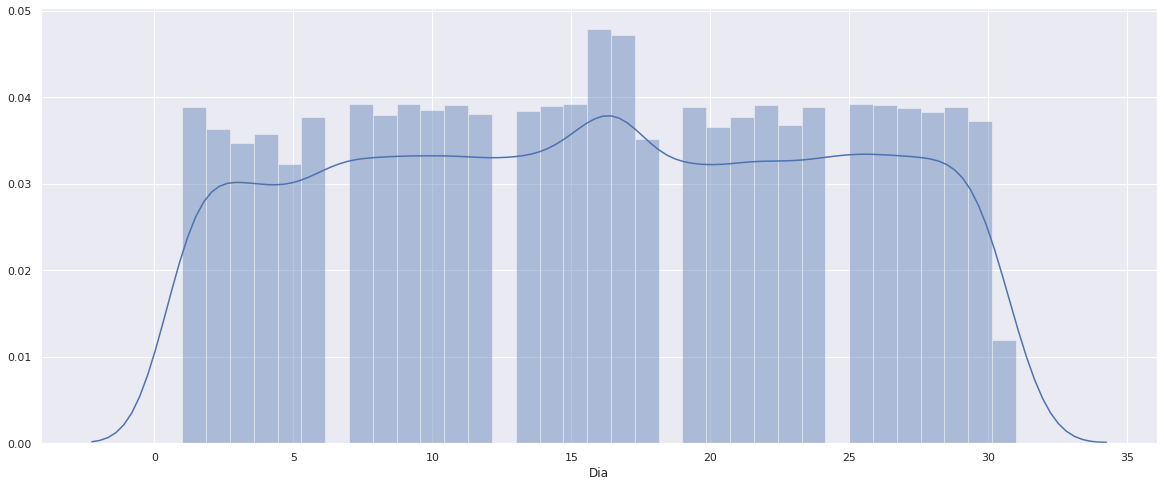

Hora


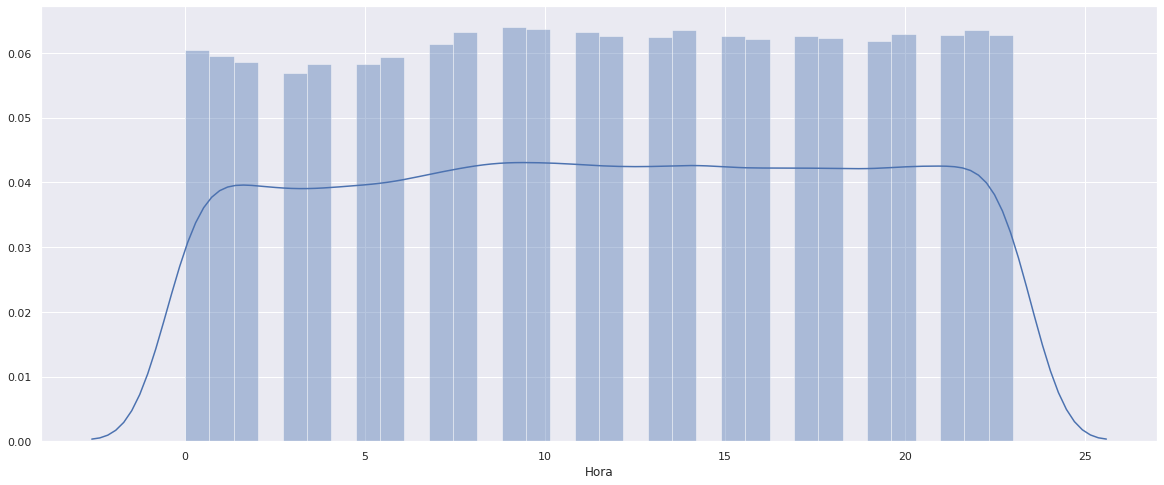

Valor_Meteorología_Dirección del Viento_Normal


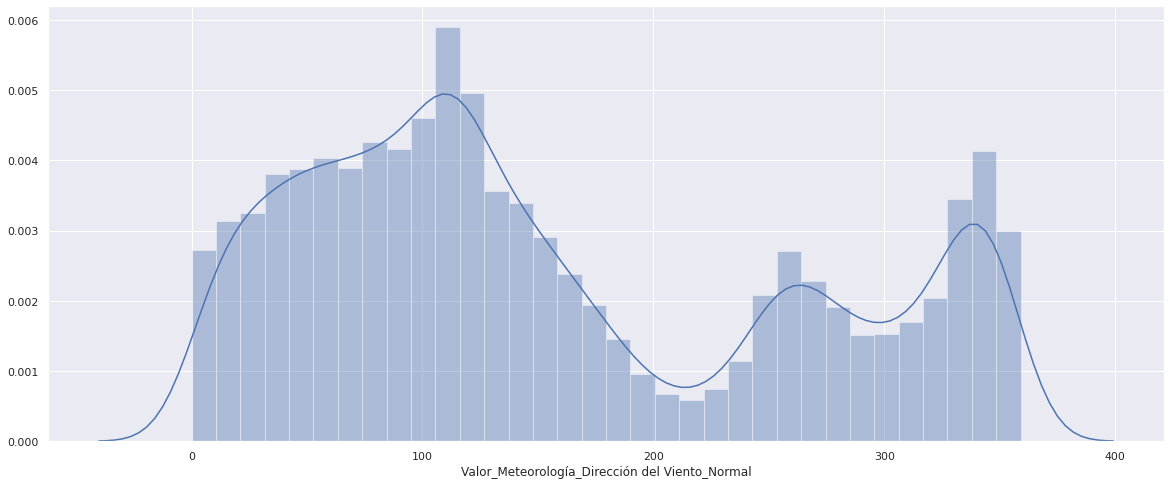

Valor_Meteorología_Humedad Relativa_Normal


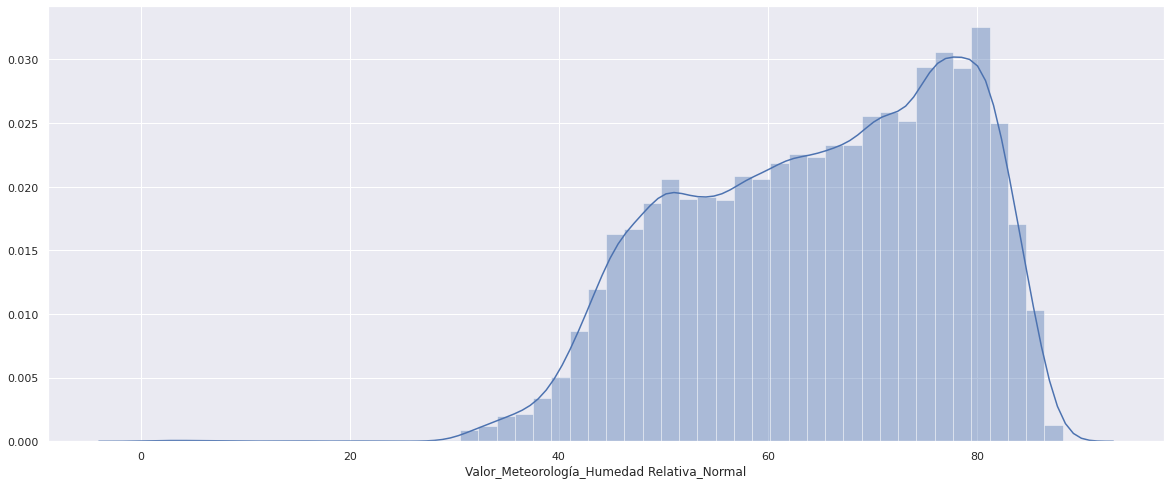

Valor_Meteorología_Precipitación_Normal


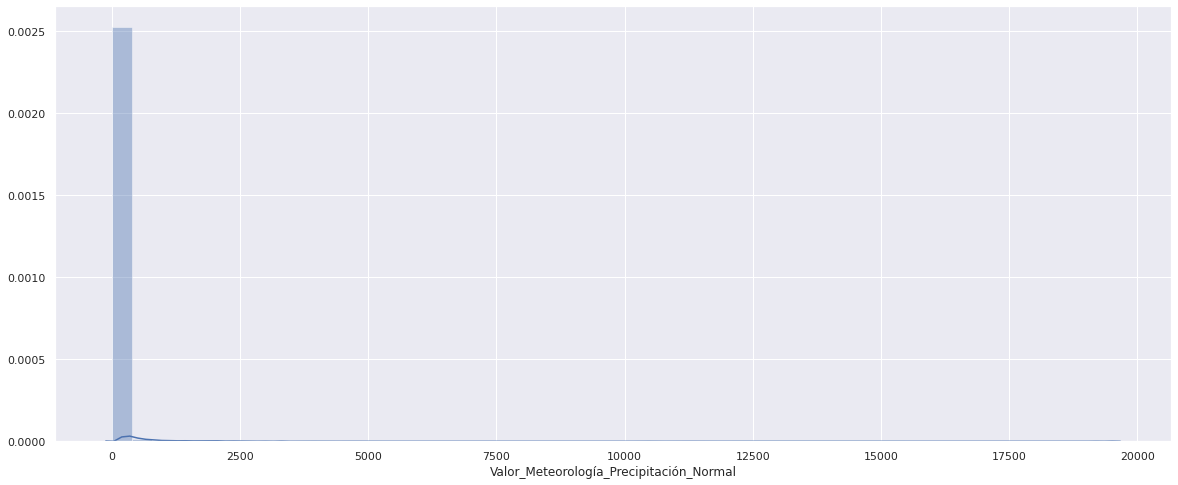

Valor_Meteorología_Presión Atmosférica_Normal


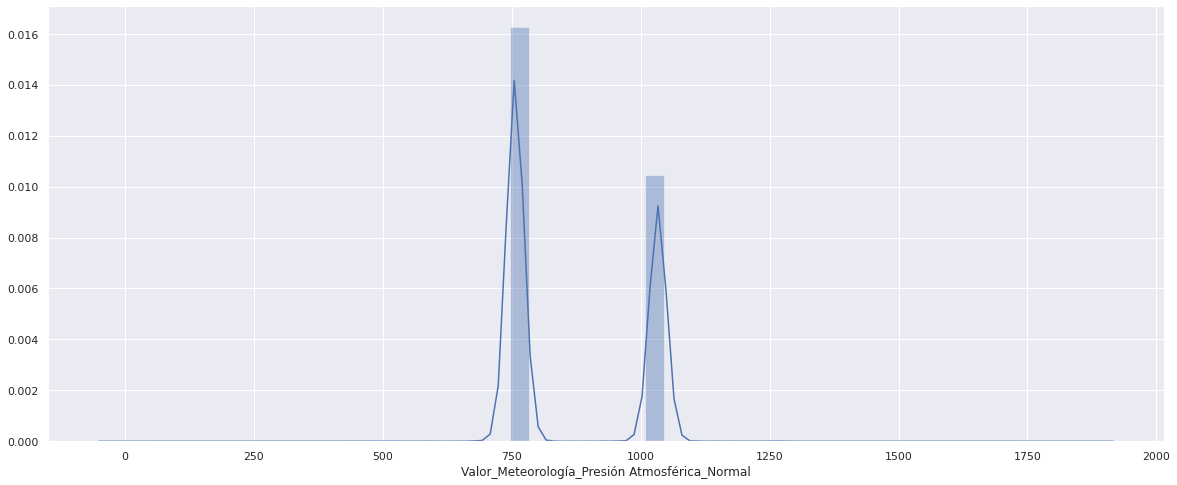

Valor_Meteorología_Temperatura Ambiente_Normal


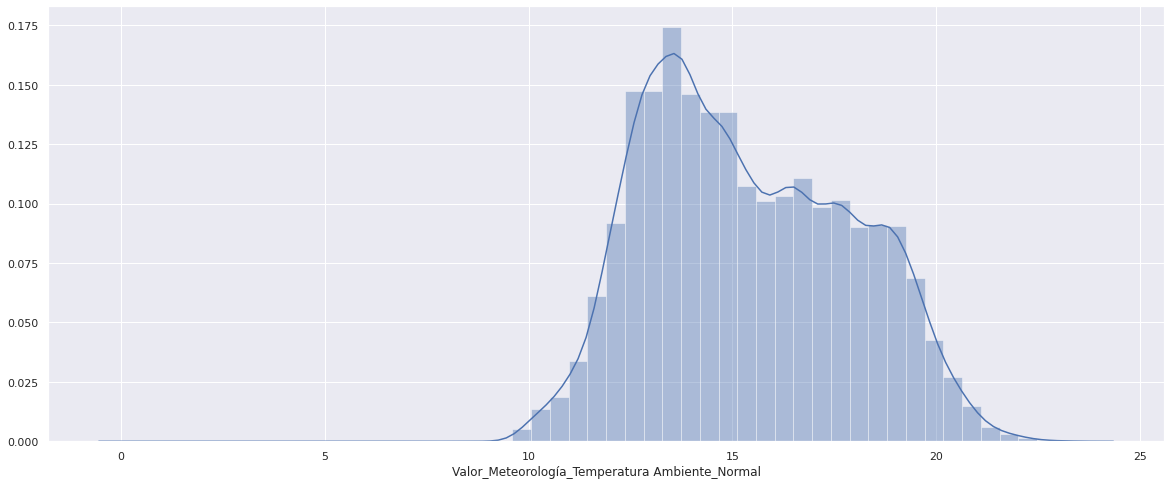

Valor_Meteorología_Velocidad del Viento_Normal


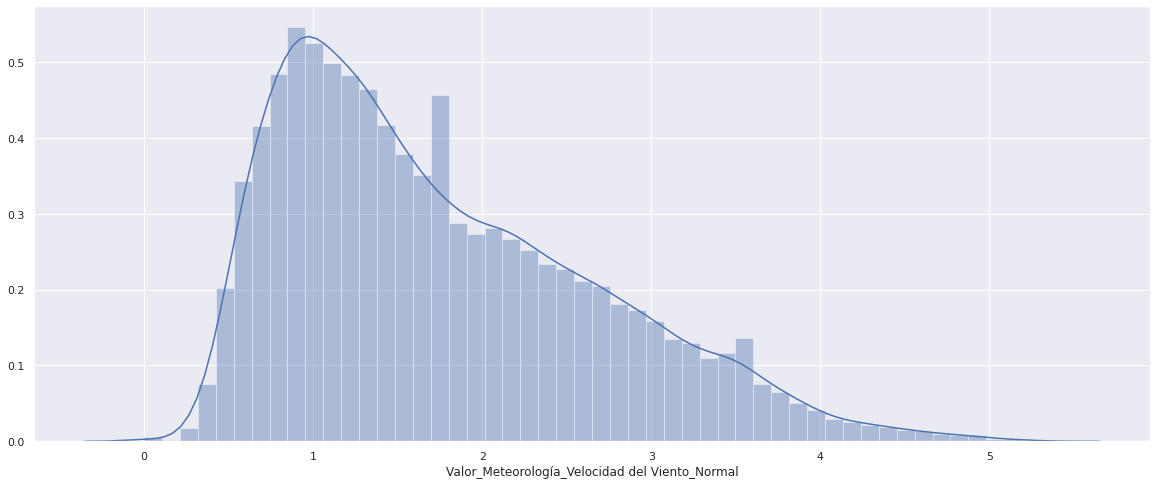

Valor_Ruido_L50_Impulso


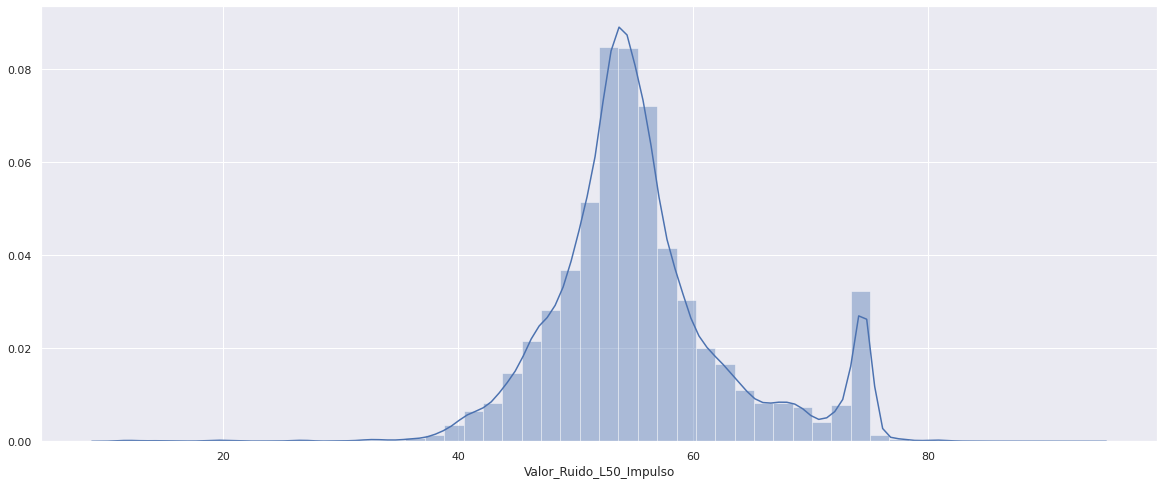

In [42]:
for var in df_aero713_sliced_more.columns[1:]:
    print(var)
    sns.distplot(df_aero713_sliced_more[df_aero713_sliced_more[var]>=0][var])
    plt.show()

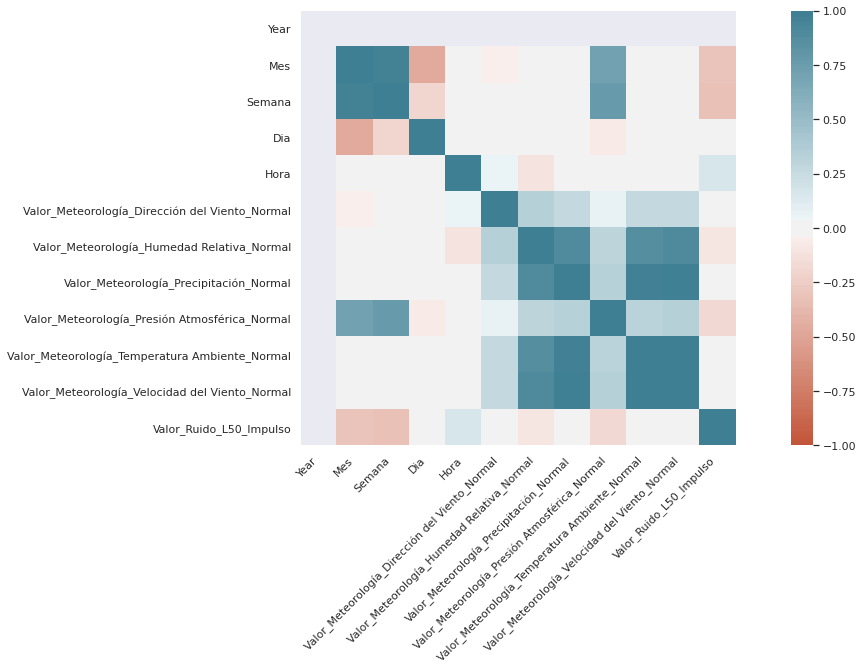

In [43]:
corr = df_aero713_sliced_more.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);